<a href="https://colab.research.google.com/github/MKangabire/CareNest/blob/main/CareNest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [10]:
#Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import seaborn as sns
import joblib
from google.colab import files
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data


In [11]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
df = pd.read_csv("/content/HR_Analytics.csv")
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
# Separate features (X) and target variable (y)
X = df.drop(columns=['Attrition'])
y = df['Attrition']
categorical_columns = X.select_dtypes(exclude=['int64', 'float64']).columns
excluded_columns = ['Over18', 'EmployeeCount', 'StandardHours'] #because it doesn't affect the attrition
if 'Over18' in X.columns:
    X['Over18'] = X['Over18'].map({'Y': 1, 'N': 0})
# One-hot encode only the necessary categorical features
multi_category_columns = [col for col in categorical_columns if col not in excluded_columns and X[col].nunique() > 1]
X = pd.get_dummies(X, columns=multi_category_columns, drop_first=True)  # Convert to numeric
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
new_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Apply StandardScaler (only to numerical features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
joblib.dump(scaler, 'scaler.pkl')
print("Preprocessing successful! Data is ready for modeling.")


Preprocessing successful! Data is ready for modeling.


#Task: Define a function that creates models without and With specified Optimization techniques


In [12]:
def define_model(optimization: str, regularization_datatype, early_stopping: bool, dropout: float, learning_rate: float):
  model = Sequential()
  if regularization_datatype is not None:
        model.add(Dense(128, activation='relu', kernel_regularizer=regularization_datatype(0.005), input_shape=(48,)))  # Regularization applied
  else:
        model.add(Dense(128, activation='relu', input_shape=(48,)))
  model.add(BatchNormalization())
  if regularization_datatype is not None:
        model.add(Dense(128, activation='relu', kernel_regularizer=regularization_datatype(0.005)))  # Regularization applied
  else:
        model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  callbacks = []
  if early_stopping:
    callbacks.append(EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True))
  model.compile(optimizer=optimization(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=400, verbose=2, callbacks=callbacks)
  return model, history
model, history = define_model(optimization=RMSprop, regularization_datatype=None, early_stopping=False, dropout=0.4, learning_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
39/39 - 3s - 69ms/step - accuracy: 0.6499 - loss: 0.6899 - val_accuracy: 0.8075 - val_loss: 0.5063
Epoch 2/400
39/39 - 0s - 5ms/step - accuracy: 0.7723 - loss: 0.5073 - val_accuracy: 0.8528 - val_loss: 0.4508
Epoch 3/400
39/39 - 0s - 5ms/step - accuracy: 0.8136 - loss: 0.4252 - val_accuracy: 0.8528 - val_loss: 0.4142
Epoch 4/400
39/39 - 0s - 8ms/step - accuracy: 0.8395 - loss: 0.3615 - val_accuracy: 0.8604 - val_loss: 0.3911
Epoch 5/400
39/39 - 0s - 7ms/step - accuracy: 0.8558 - loss: 0.3524 - val_accuracy: 0.8642 - val_loss: 0.3878
Epoch 6/400
39/39 - 0s - 6ms/step - accuracy: 0.8793 - loss: 0.3134 - val_accuracy: 0.8604 - val_loss: 0.3795
Epoch 7/400
39/39 - 0s - 8ms/step - accuracy: 0.8938 - loss: 0.2682 - val_accuracy: 0.8566 - val_loss: 0.3881
Epoch 8/400
39/39 - 0s - 5ms/step - accuracy: 0.8849 - loss: 0.2746 - val_accuracy: 0.8717 - val_loss: 0.3732
Epoch 9/400
39/39 - 0s - 6ms/step - accuracy: 0.8898 - loss: 0.2413 - val_accuracy: 0.8717 - val_loss: 0.3983
Epoch 10/

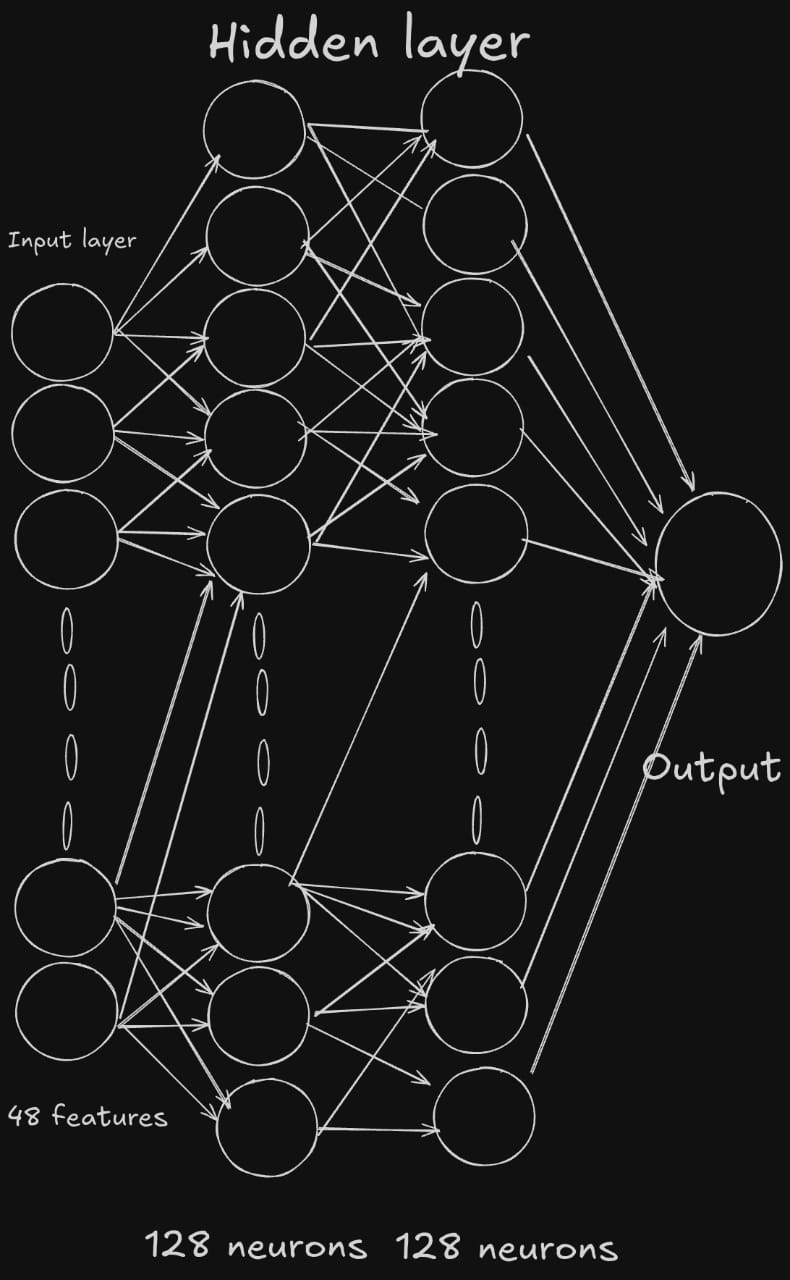

In [13]:
from IPython.display import Image

display(Image(filename="WhatsApp Image 2025-02-23 at 18.43.15.jpeg"))

# Task: Print out the Final Model Accuracy and plot the Loss curve

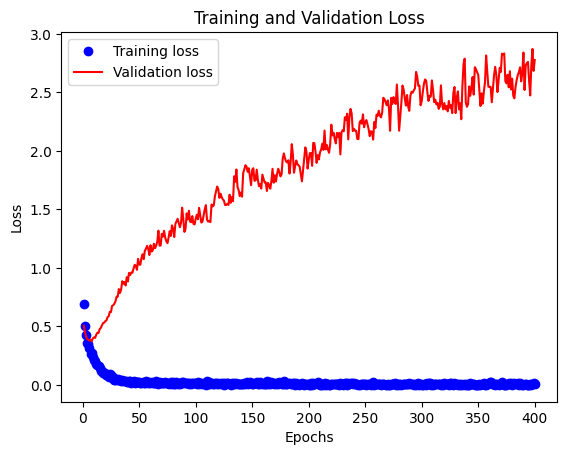

In [14]:
def loss_curve_plot(history):
  epochs =  epochs = range(1, len(history.history['loss']) + 1)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

loss_curve_plot(history)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Evaluation:
Accuracy: 0.7698
Precision: 0.5902
Recall: 0.5000
F1 Score: 0.5414


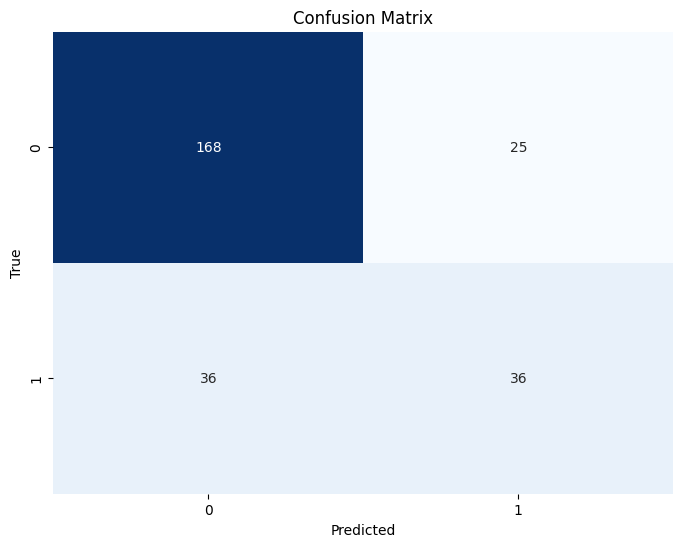

In [15]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
model.save("default.h5")

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 - 2s - 54ms/step - accuracy: 0.6629 - loss: 8.7858 - val_accuracy: 0.7358 - val_loss: 7.8855
Epoch 2/400
39/39 - 0s - 9ms/step - accuracy: 0.7877 - loss: 7.1665 - val_accuracy: 0.8226 - val_loss: 6.5097
Epoch 3/400
39/39 - 0s - 7ms/step - accuracy: 0.8339 - loss: 5.9181 - val_accuracy: 0.8000 - val_loss: 5.4467
Epoch 4/400
39/39 - 0s - 8ms/step - accuracy: 0.8647 - loss: 4.9111 - val_accuracy: 0.7774 - val_loss: 4.6184
Epoch 5/400
39/39 - 0s - 6ms/step - accuracy: 0.8622 - loss: 4.1763 - val_accuracy: 0.7962 - val_loss: 3.9838
Epoch 6/400
39/39 - 0s - 7ms/step - accuracy: 0.8679 - loss: 3.6312 - val_accuracy: 0.7962 - val_loss: 3.4936
Epoch 7/400
39/39 - 0s - 8ms/step - accuracy: 0.8841 - loss: 3.1202 - val_accuracy: 0.7962 - val_loss: 3.0714
Epoch 8/400
39/39 - 0s - 5ms/step - accuracy: 0.8906 - loss: 2.6980 - val_accuracy: 0.7962 - val_loss: 2.7612
Epoch 9/400
39/39 - 0s - 8ms/step - accuracy: 0.8963 - loss: 2.3819 - val_accuracy: 0.8038 - val_loss: 2.4620
Epoch 10/400
39/39 - 

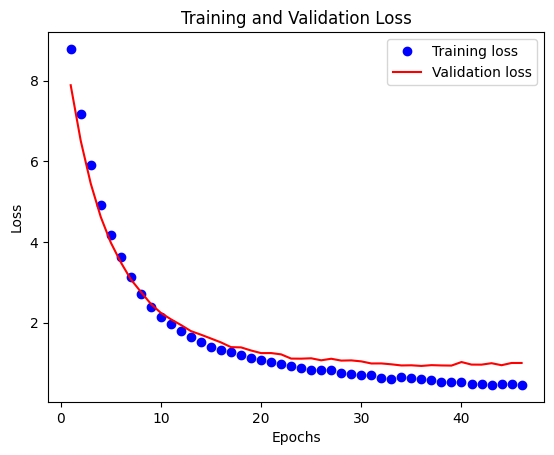

In [16]:
#TODO:
model_2, history_2 = define_model(optimization=RMSprop, regularization_datatype=l1, early_stopping=True, dropout=0.4, learning_rate=0.001)
loss_curve_plot(history_2)
#print out confusion matrix and error analysis metrics after the cell

In [27]:
model_2.save("model_2.h5")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Evaluation:
Accuracy: 0.7925
Precision: 0.6667
Recall: 0.4722
F1 Score: 0.5528


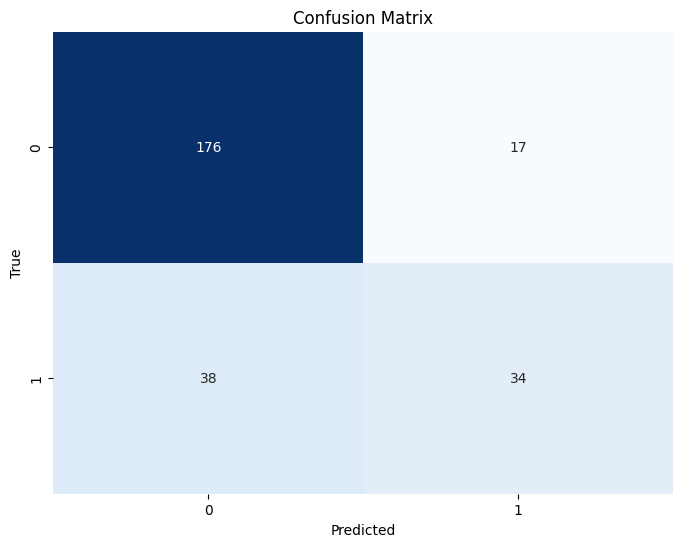

In [17]:
y_pred = (model_2.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/400
39/39 - 9s - 231ms/step - accuracy: 0.6029 - loss: 1.7852 - val_accuracy: 0.6340 - val_loss: 1.5980
Epoch 2/400
39/39 - 1s - 22ms/step - accuracy: 0.7188 - loss: 1.5585 - val_accuracy: 0.7811 - val_loss: 1.4544
Epoch 3/400
39/39 - 1s - 16ms/step - accuracy: 0.7561 - loss: 1.4435 - val_accuracy: 0.8075 - val_loss: 1.3730
Epoch 4/400
39/39 - 0s - 11ms/step - accuracy: 0.8112 - loss: 1.3350 - val_accuracy: 0.8151 - val_loss: 1.3111
Epoch 5/400
39/39 - 1s - 16ms/step - accuracy: 0.8071 - loss: 1.2720 - val_accuracy: 0.8151 - val_loss: 1.2666
Epoch 6/400
39/39 - 1s - 37ms/step - accuracy: 0.8225 - loss: 1.2256 - val_accuracy: 0.8264 - val_loss: 1.2405
Epoch 7/400
39/39 - 1s - 36ms/step - accuracy: 0.8493 - loss: 1.1798 - val_accuracy: 0.8302 - val_loss: 1.2216
Epoch 8/400
39/39 - 1s - 18ms/step - accuracy: 0.8655 - loss: 1.1249 - val_accuracy: 0.8340 - val_loss: 1.2065
Epoch 9/400
39/39 - 1s - 21ms/step - accuracy: 0.8728 - loss: 1.1028 - val_accuracy: 0.8151 - val_loss: 1.1827


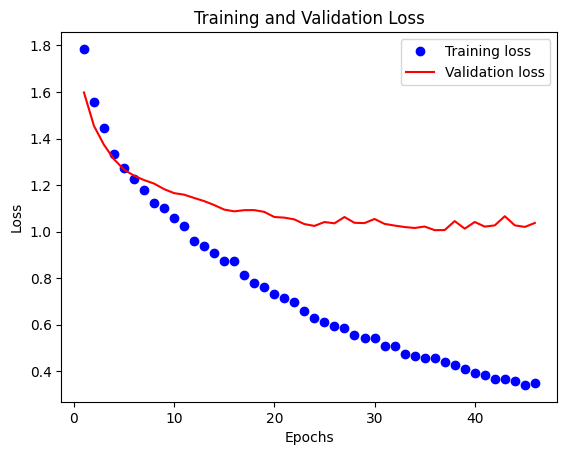

In [26]:
#TODO:
model_3,history_3 = define_model(optimization=Adam, regularization_datatype=l2, early_stopping=True, dropout=0.2, learning_rate=0.0005)
loss_curve_plot(history_3)
model_3.save("model_3.h5")
#print out confusion matrix and error analysis metrics after the cell

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model Evaluation:
Accuracy: 0.7774
Precision: 0.6140
Recall: 0.4861
F1 Score: 0.5426


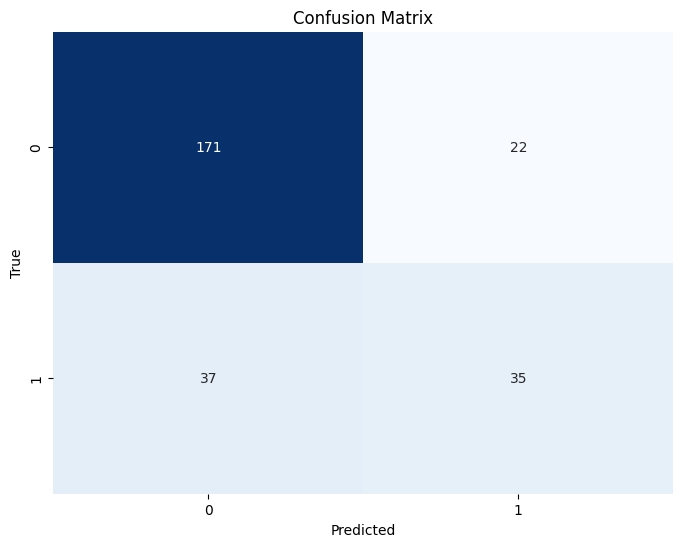

In [19]:
y_pred = (model_3.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 - 3s - 73ms/step - accuracy: 0.6021 - loss: 9.4796 - val_accuracy: 0.6792 - val_loss: 8.9417
Epoch 2/400
39/39 - 0s - 5ms/step - accuracy: 0.7083 - loss: 8.6035 - val_accuracy: 0.8075 - val_loss: 8.1583
Epoch 3/400
39/39 - 0s - 8ms/step - accuracy: 0.7796 - loss: 7.8360 - val_accuracy: 0.8340 - val_loss: 7.4491
Epoch 4/400
39/39 - 0s - 7ms/step - accuracy: 0.8031 - loss: 7.1455 - val_accuracy: 0.8302 - val_loss: 6.8185
Epoch 5/400
39/39 - 0s - 8ms/step - accuracy: 0.8347 - loss: 6.5198 - val_accuracy: 0.8189 - val_loss: 6.2492
Epoch 6/400
39/39 - 0s - 8ms/step - accuracy: 0.8160 - loss: 6.0091 - val_accuracy: 0.8264 - val_loss: 5.7579
Epoch 7/400
39/39 - 0s - 5ms/step - accuracy: 0.8428 - loss: 5.5097 - val_accuracy: 0.8151 - val_loss: 5.3197
Epoch 8/400
39/39 - 0s - 8ms/step - accuracy: 0.8582 - loss: 5.0445 - val_accuracy: 0.8264 - val_loss: 4.9179
Epoch 9/400
39/39 - 0s - 5ms/step - accuracy: 0.8712 - loss: 4.6489 - val_accuracy: 0.8151 - val_loss: 4.5695
Epoch 10/400
39/39 - 

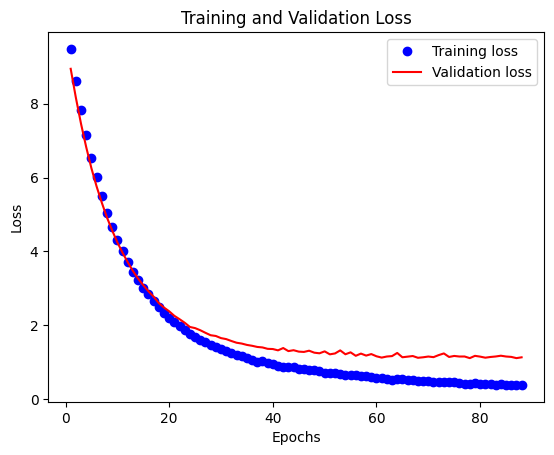

In [20]:
#TODO:
model_4, history_4 = define_model(optimization=RMSprop, regularization_datatype=l1_l2, early_stopping=True, dropout=0.2, learning_rate=0.0005)
loss_curve_plot(history_4)
model_4.save("model_4.h5")
#print out confusion matrix and error analysis metrics after the cell

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Model Evaluation:
Accuracy: 0.7358
Precision: 0.5147
Recall: 0.4861
F1 Score: 0.5000


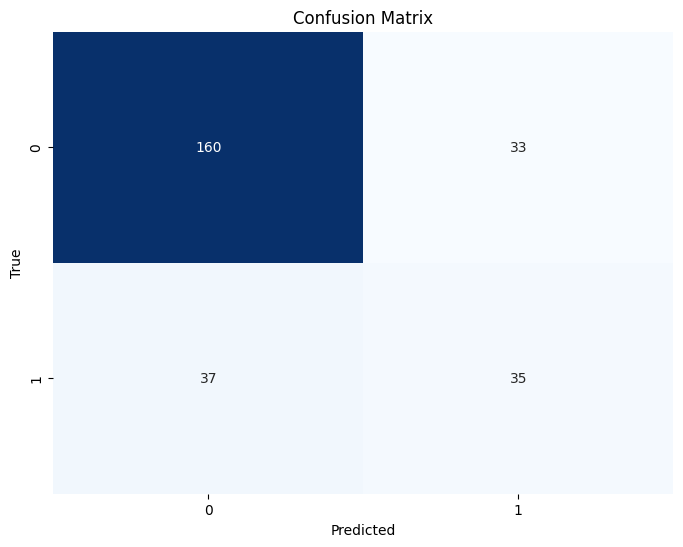

In [21]:
y_pred = (model_4.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7962
Precision: 0.6552
Recall: 0.5278
F1 Score: 0.5846


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


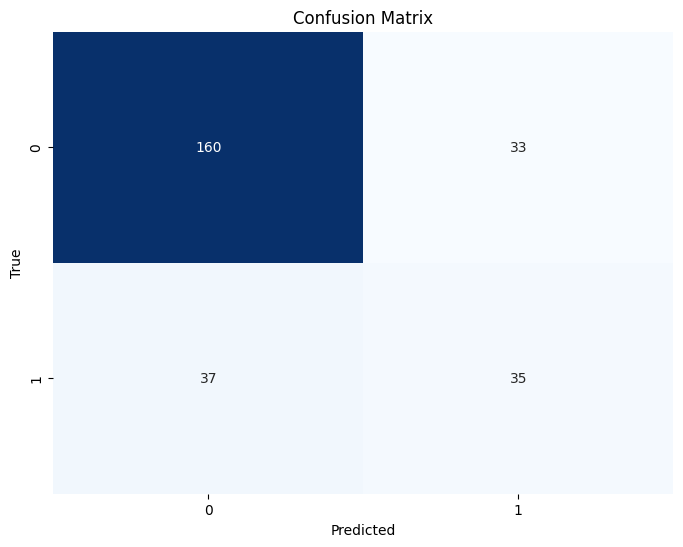

In [22]:
#using LogisticRegression
model5 = LogisticRegression(penalty='l1',
                            tol=0.001, C=1.0,
                            n_jobs= -1,
                            solver='liblinear')

model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_pred = model5.predict(X_test)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [23]:
def make_predictions(model_path, X):

    # Load the model
    model = load_model(model_4.h5)
    scaler = joblib.load('scaler.pkl')
    feature_names = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
                 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
    employee_data = {}
    for feature in feature_names:
        value = input(f"Enter {feature}: ")
        employee_data[feature] = float(value)
    employee_df = pd.DataFrame([employee_data])
    employee_scaled = scaler.transform(employee_df)
    if employee_scaled.shape[1] != 48:
      employee_scaled = employee_scaled.reshape(1, 48)
    predictions = model.predict(employee_scaled)
    prediction_binary = (predictions > 0.5).astype(int)
    # Convert probabilities to binary labels (0 or 1)

    if prediction_binary[0] == 0:
      print("\n🔵 The employee is **NOT** likely to leave the company.")
    else:
      print("\n🔴 The employee is **LIKELY** to leave the company.")

#Modify the code appropriately

In [24]:
print(X.shape)
print(y.shape)
model_4.summary()

(1764, 48)
(1764,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,364 (185.02 KB)

 Trainable params: 23,425 (91.50 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 23,427 (91.52 KB)

In [25]:
# X = np.array(X)
# if X.shape[1] != 48:
#     X = X.reshape(-1, 48)
# model_path = 'model_4.h5'
# predictions = make_predictions(model_path, X_scaled)
# predictions_binary = (predictions > 0.5).astype(int)
# model

Congratulations!!
